Name: Zhuoyou Shen

ID: 2035073656

GitHub Username: zhuoyous

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import  accuracy_score, confusion_matrix, roc_curve, roc_auc_score,auc
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold,GridSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import cv
from imblearn.over_sampling import SMOTE

(b)

i.


1.imputation by Mean, Median and Mode

2.use KNN to impute the missing value

3.forward and backward selection for the missing value

I will fill the missing values with Mean values

In [2]:
train_data = pd.read_csv('../data/aps_failure_training_set.csv', skiprows = 20 , na_values = ['na'])
test_data = pd.read_csv('../data/aps_failure_test_set.csv', skiprows = 20 , na_values = ['na'])
train_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [3]:
test_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [4]:
whole_data = pd.concat([train_data,test_data],axis = 0)
whole_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [5]:
whole_data.fillna(whole_data.mean(),inplace = True)
whole_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


ii.

In [6]:
cv = pd.DataFrame(whole_data.std()/whole_data.mean(),columns = ['cv'])
cv

,cv
aa_000,4.328608
ab_000,2.178273
ac_000,2.167653
ad_000,206.721500
ae_000,22.293670
...,...
ee_007,4.885098
ee_008,3.335037
ee_009,5.753933
ef_000,47.919544


iii.

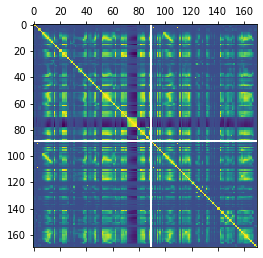

In [7]:
plt.matshow(whole_data.corr())

iv.

In [8]:
cv = cv.sort_values('cv',ascending = False)
cv

,cv
cf_000,207.270274
co_000,206.876129
ad_000,206.721500
cs_009,192.522611
dj_000,122.128153
...,...
bo_000,0.462899
bp_000,0.426905
bq_000,0.400264
br_000,0.383867


In [9]:
cv.head(13)

,cv
cf_000,207.270274
co_000,206.876129
ad_000,206.721500
cs_009,192.522611
dj_000,122.128153
as_000,113.882755
dh_000,112.652450
df_000,111.369666
ag_000,91.460654
au_000,86.085638


In [10]:
new_df = pd.DataFrame()
s0 = pd.Series(whole_data['class'])
s1 = pd.Series(whole_data['cf_000'])
s2 = pd.Series(whole_data['co_000'])
s3 = pd.Series(whole_data['ad_000'])
s4 = pd.Series(whole_data['cs_009'])
s5 = pd.Series(whole_data['dj_000'])
s6 = pd.Series(whole_data['as_000'])
s7 = pd.Series(whole_data['dh_000'])
s8 = pd.Series(whole_data['df_000'])
s9 = pd.Series(whole_data['ag_000'])
s10 = pd.Series(whole_data['au_000'])
s11 = pd.Series(whole_data['ak_000'])
s12 = pd.Series(whole_data['az_009'])
s13 = pd.Series(whole_data['ay_009'])

new_df = pd.concat([s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13],axis = 1)
new_df

,class,cf_000,co_000,ad_000,cs_009,dj_000,as_000,dh_000,df_000,ag_000,au_000,ak_000,az_009,ay_009
0,neg,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,neg,150231.156793,150517.375485,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,neg,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,neg,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,neg,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,2.000000,42.000000,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,neg,2.000000,0.000000,46.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,neg,2.000000,378.000000,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,neg,0.000000,0.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


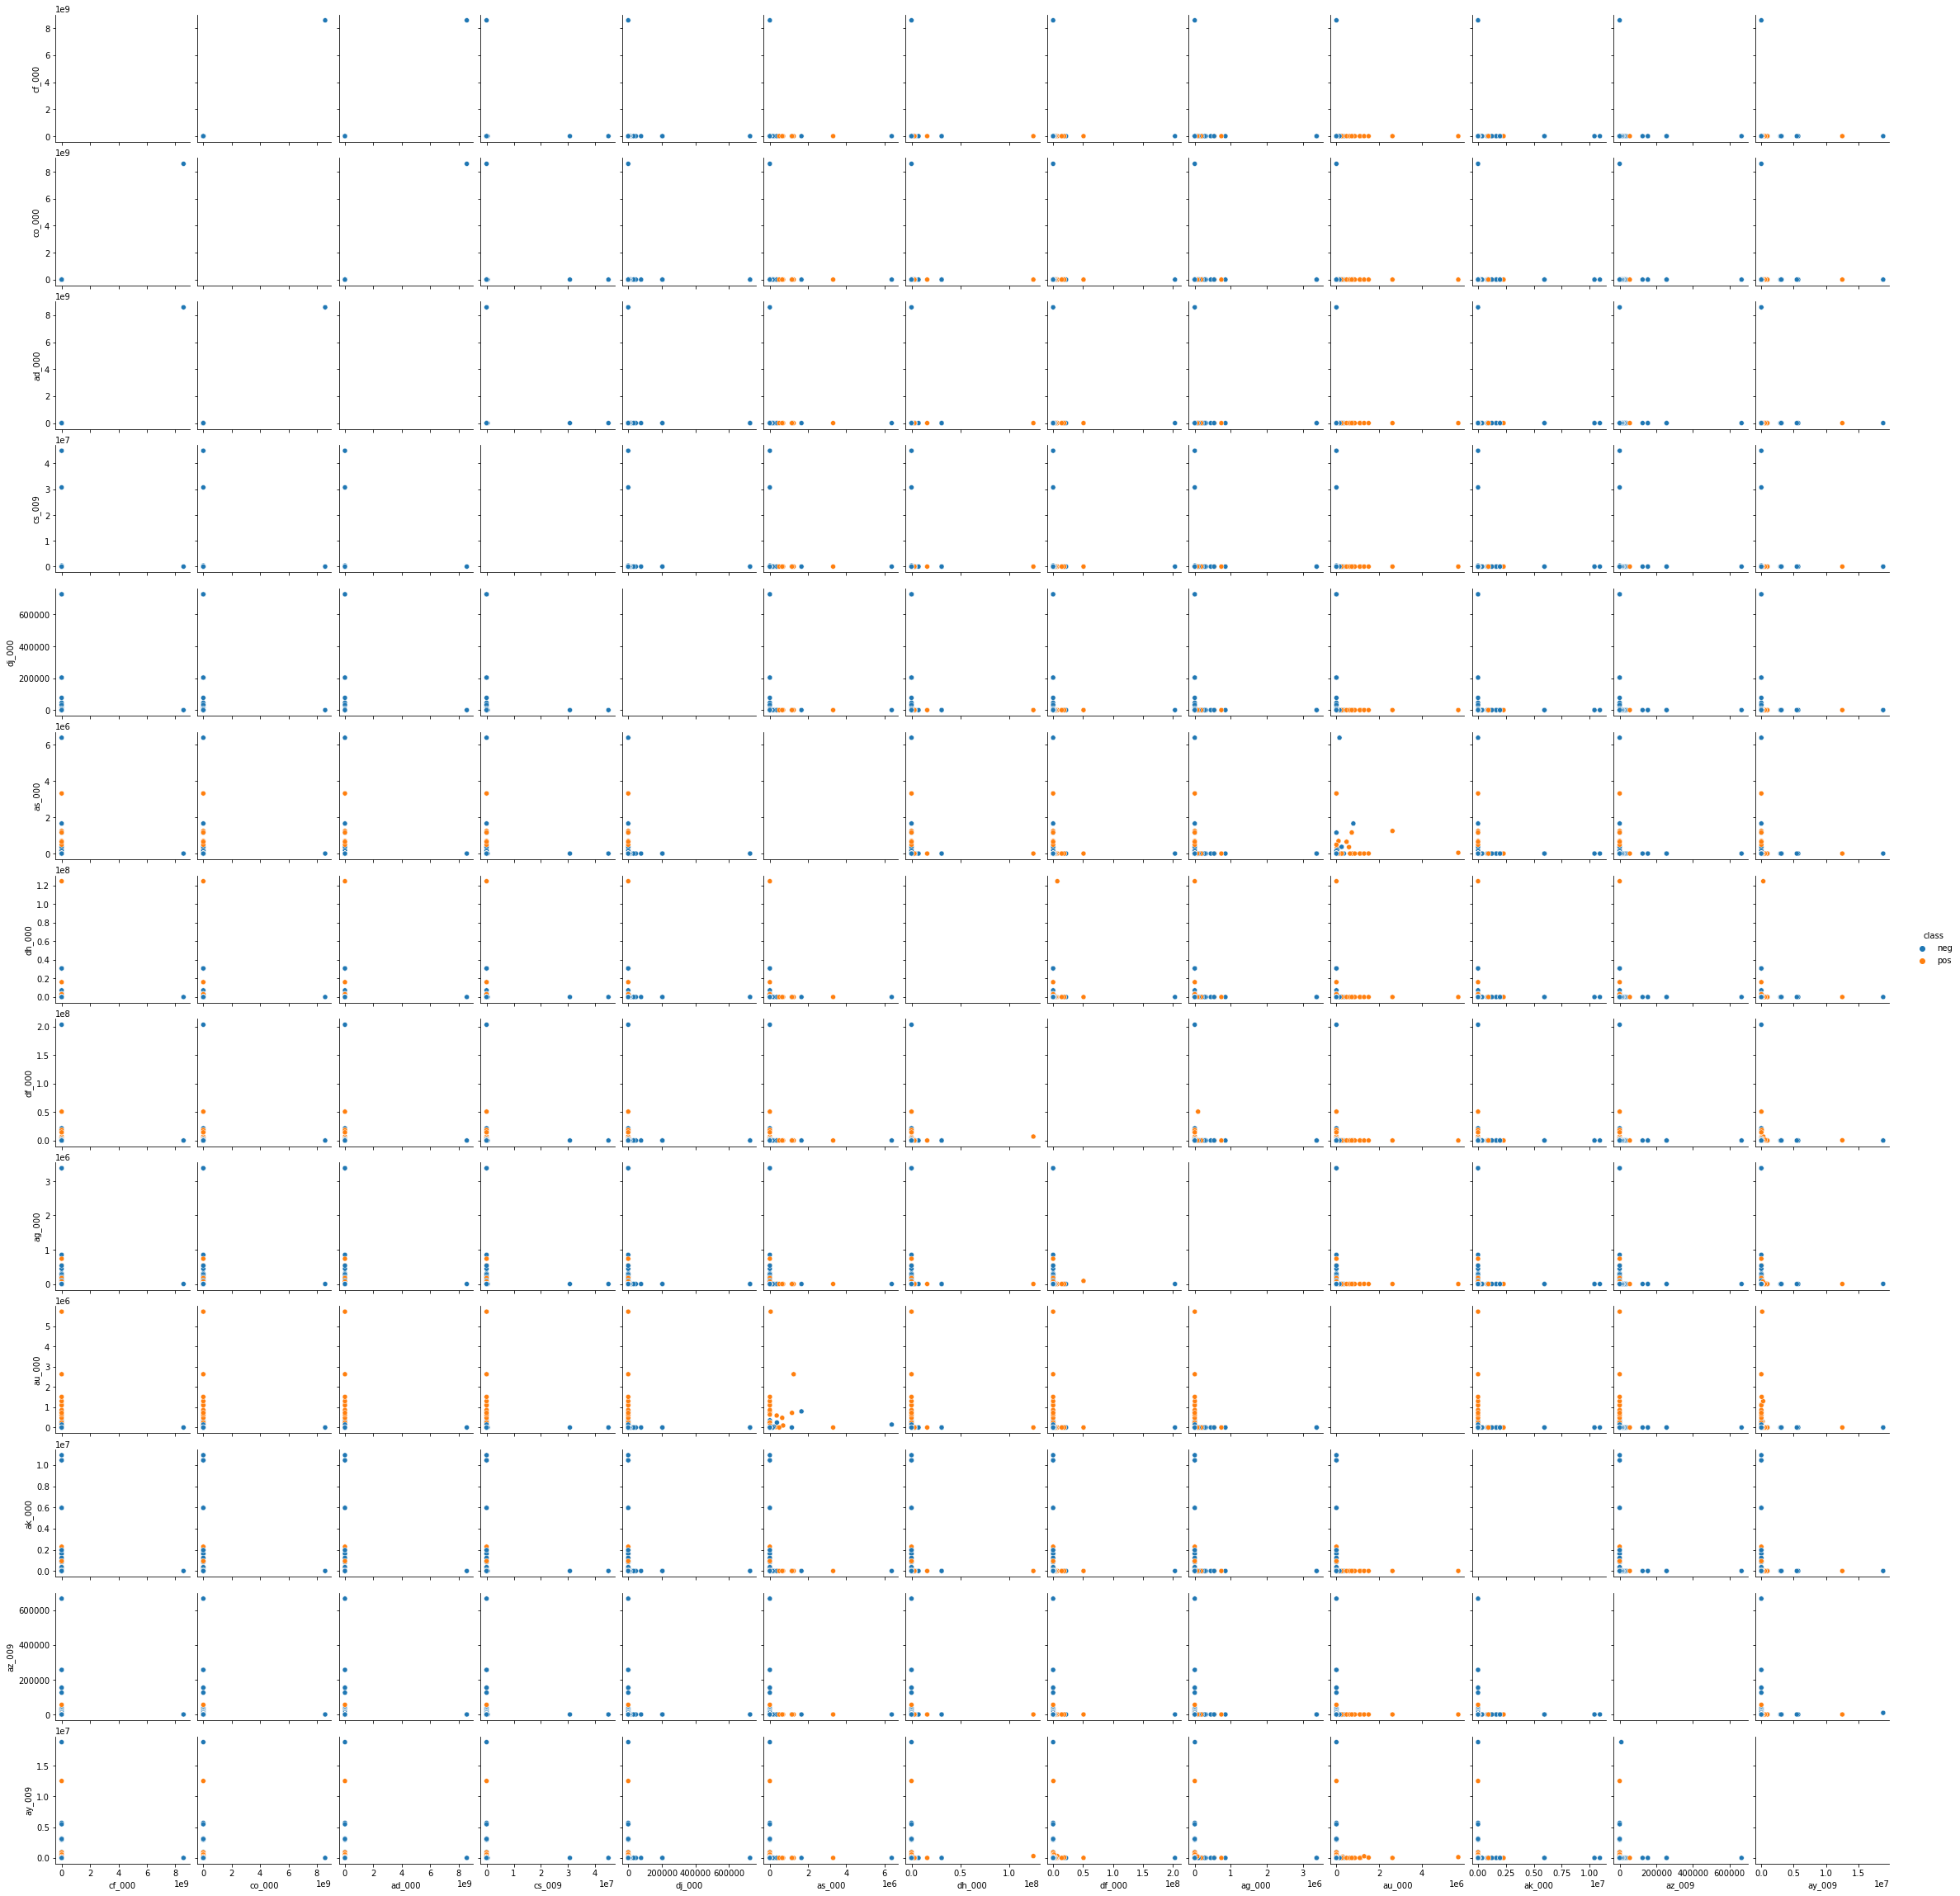

In [11]:
sns.pairplot(new_df,diag_kind = 'none',hue = 'class')

<AxesSubplot:>

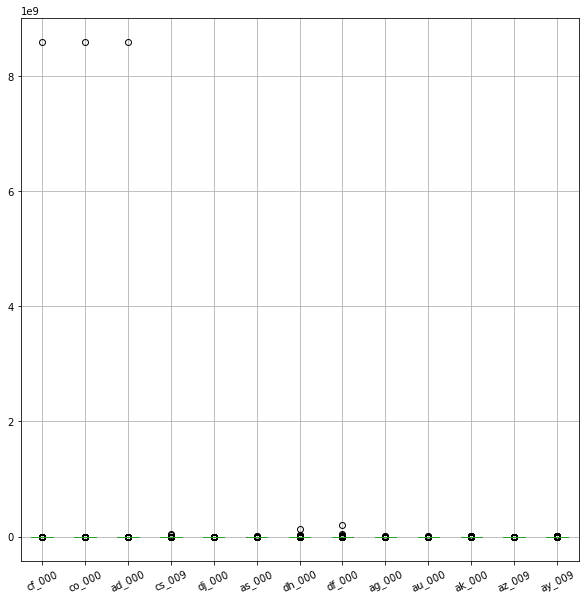

In [12]:
new_df.boxplot(figsize=(10, 10),rot=25)

For the graph above, we cannot draw any conclusions about significance of those feature. However, some of them seemed linearly separable.

v.

In [13]:
print(whole_data['class'].value_counts())

neg    74625
pos     1375
Name: class, dtype: int64


The dataset is imblanced for a lot of negatives and few positives.

(c)

In [14]:
#filt = whole_data['class'] == 'neg'
#whole_data.loc[filt,'class'] = 0.0

In [15]:
#filt = whole_data['class'] == 'pos'
#whole_data.loc[filt,'class'] = 1.0

In [16]:
train_data = whole_data.iloc[:60000,:]
train_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.72556,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.72556,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.00000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.72556,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [17]:
test_data = whole_data.iloc[60000:,:]
test_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.00000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.00000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.00000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.72556,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.72556,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.72556,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.00000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.72556,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.72556,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [18]:
# train,test dataset
train_data_x = train_data.iloc[:,1:]
train_data_label = train_data['class']
test_data_x = test_data.iloc[:,1:]
test_data_label = test_data['class']

In [19]:
rf_model = RandomForestClassifier(oob_score = True)
rf_model.fit(train_data_x,train_data_label)
pre_train = rf_model.predict(train_data_x)
pre_test = rf_model.predict(test_data_x)
train_error = accuracy_score(pre_train,train_data_label)
test_error = accuracy_score(pre_test,test_data_label)
obb_error = rf_model.oob_score_
im_train_error = 1-train_error
im_test_error = 1-test_error
im_oob_error = 1 -obb_error
print('the train error is ',1-train_error)
print('the test error is ',1-test_error)
print('the Out of Bag error is',1 -obb_error)

the train error is  3.333333333332966e-05
the test error is  0.007499999999999951
the Out of Bag error is 0.005833333333333357


Confusion Matrix of Training

In [20]:
cm = metrics.confusion_matrix(train_data_label, pre_train)
print(cm)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
print("TRUE POSITIVE: ",TP)
print("FALSE POSITIVE: ",FP)
print("TRUE NEGATIVE: ",TN)
print("FALSE NEGATIVE: ",FN)

[[59000     0]
 [    2   998]]
TRUE POSITIVE:  998
FALSE POSITIVE:  0
TRUE NEGATIVE:  59000
FALSE NEGATIVE:  2


Misclassification for training

In [21]:
print('The Misclassification for training is',FP+FN)

The Misclassification for training is 2


Confusion Matrix of Testing

In [22]:
cm = metrics.confusion_matrix(test_data_label, pre_test)
print(cm)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
print("TRUE POSITIVE: ",TP)
print("FALSE POSITIVE: ",FP)
print("TRUE NEGATIVE: ",TN)
print("FALSE NEGATIVE: ",FN)

[[15606    19]
 [  101   274]]
TRUE POSITIVE:  274
FALSE POSITIVE:  19
TRUE NEGATIVE:  15606
FALSE NEGATIVE:  101


Misclassification for testing

In [23]:
print('The Misclassification for training is',FP+FN)

The Misclassification for training is 120


Training

In [24]:
binar_transform = preprocessing.LabelBinarizer()
df = binar_transform.fit_transform(train_data_label)
df =train_label = pd.DataFrame(df)
df2=binar_transform.fit_transform(pre_train)
df2 =pd.DataFrame(df2)

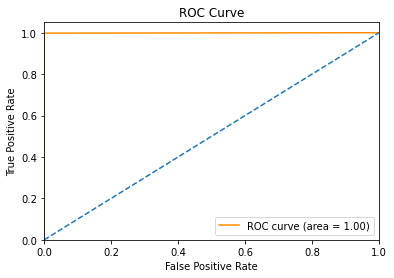

auc is : 0.999000


In [25]:
fpr, tpr, thresholds = roc_curve(df,df2)
roc_auc = auc(fpr, tpr)
im_train_auc = roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("auc is : %f" %roc_auc)

Testing

In [26]:
binar_transform = preprocessing.LabelBinarizer()
df = binar_transform.fit_transform(test_data_label)
df = test_label = pd.DataFrame(df)
df2=binar_transform.fit_transform(pre_test)
df2 =pd.DataFrame(df2)

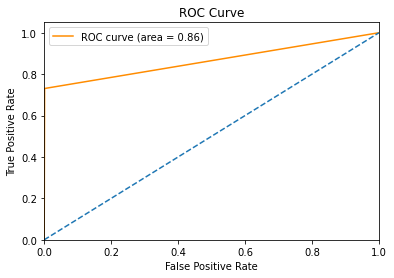

auc is : 0.864725


In [27]:
fpr, tpr, thresholds = roc_curve(df,df2)
roc_auc = auc(fpr, tpr)
im_test_auc = roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("auc is : %f" %roc_auc)

(d)

In [28]:
rf_model = RandomForestClassifier(oob_score = True,class_weight = 'balanced')
rf_model.fit(train_data_x,train_data_label)
pre_train = rf_model.predict(train_data_x)
pre_test = rf_model.predict(test_data_x)
train_error = accuracy_score(pre_train,train_data_label)
test_error = accuracy_score(pre_test,test_data_label)
obb_error = rf_model.oob_score_
b_train_error = 1-train_error
b_test_error = 1-test_error
b_oob_error = 1 -obb_error
print('the train error is ',1-train_error)
print('the test error is ',1-test_error)
print('the Out of Bag error is',1 -obb_error)

the train error is  0.0
the test error is  0.011249999999999982
the Out of Bag error is 0.007833333333333359


Confusion Matrix of Training

In [29]:
cm = metrics.confusion_matrix(train_data_label, pre_train)
print(cm)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
print("TRUE POSITIVE: ",TP)
print("FALSE POSITIVE: ",FP)
print("TRUE NEGATIVE: ",TN)
print("FALSE NEGATIVE: ",FN)

[[59000     0]
 [    0  1000]]
TRUE POSITIVE:  1000
FALSE POSITIVE:  0
TRUE NEGATIVE:  59000
FALSE NEGATIVE:  0


In [30]:
print('The Misclassification for training is',FP+FN)

The Misclassification for training is 0


Confusion Matrix of Testing

In [31]:
cm = metrics.confusion_matrix(test_data_label, pre_test)
print(cm)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
print("TRUE POSITIVE: ",TP)
print("FALSE POSITIVE: ",FP)
print("TRUE NEGATIVE: ",TN)
print("FALSE NEGATIVE: ",FN)

[[15610    15]
 [  165   210]]
TRUE POSITIVE:  210
FALSE POSITIVE:  15
TRUE NEGATIVE:  15610
FALSE NEGATIVE:  165


Misclassification for testing

In [32]:
print('The Misclassification for training is',FP+FN)

The Misclassification for training is 180


Training

In [33]:
binar_transform = preprocessing.LabelBinarizer()
df = binar_transform.fit_transform(train_data_label)
df = pd.DataFrame(df)
df2=binar_transform.fit_transform(pre_train)
df2 =pd.DataFrame(df2)

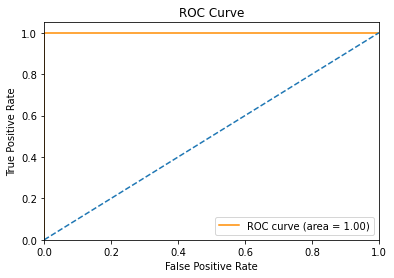

auc is : 1.000000


In [34]:
fpr, tpr, thresholds = roc_curve(df,df2)
roc_auc = auc(fpr, tpr)
b_train_auc = roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("auc is : %f" %roc_auc)

Testing

In [35]:
binar_transform = preprocessing.LabelBinarizer()
df = binar_transform.fit_transform(test_data_label)
df = pd.DataFrame(df)
df2=binar_transform.fit_transform(pre_test)
df2 =pd.DataFrame(df2)

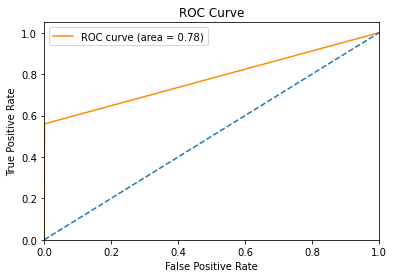

auc is : 0.779520


In [36]:
fpr, tpr, thresholds = roc_curve(df,df2)
roc_auc = auc(fpr, tpr)
b_test_auc = roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("auc is : %f" %roc_auc)

In [37]:
data = {'imbalanced':[im_train_error ,
im_test_error, im_oob_error,im_train_auc,im_test_auc ],'balanced':[b_train_error,b_test_error,b_oob_error,b_train_auc,b_test_auc]}

In [38]:
table = pd.DataFrame(data)
table.set_axis(['training error', 'test error', 'out of bag error','train auc','test auc'], axis='index')

,imbalanced,balanced
training error,0.000033,0.000000
test error,0.007500,0.011250
out of bag error,0.005833,0.007833
train auc,0.999000,1.000000
test auc,0.864725,0.779520


Out of Bag error estimate is positively realated to the test error.

When we use imbalanced dataset, the results seemed to be good. However, since the dataset is not balanced, the result is not real and accurate. 

(e)

For Training

In [39]:
alpha=[0, 0.001, 0.003, 0.005, 0.007, 0.01]
xgb_model = xgb.XGBClassifier(objective = 'reg:logistic')
xgb_parameters = {'reg_alpha': alpha}
val = GridSearchCV(xgb_model, xgb_parameters, cv = 10)
val = val.fit(train_data_x.values, train_label.values.flatten())
best_a = aa = val.best_params_['reg_alpha']
print('best a is :', best_a)

best a is : 0.01


In [40]:
xgb_model = xgb.XGBClassifier(objective='reg:logistic', reg_alpha = best_a)
xgb_model = xgb_model.fit(train_data_x, train_label)
score = cross_val_score(xgb_model,train_data_x,train_label,scoring = 'accuracy',cv = 5)
pre = xgb_model.predict(train_data_x)
print('the error of 5-fold of training is:', 1-np.mean(score))
ww = 1-np.mean(score)

the error of 5-fold of training is: 0.005316666666666636


Confusion Matrix of Training

In [41]:
cm = metrics.confusion_matrix(train_label, pre)
print(cm)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
print("TRUE POSITIVE: ",TP)
print("FALSE POSITIVE: ",FP)
print("TRUE NEGATIVE: ",TN)
print("FALSE NEGATIVE: ",FN)

[[59000     0]
 [    1   999]]
TRUE POSITIVE:  999
FALSE POSITIVE:  0
TRUE NEGATIVE:  59000
FALSE NEGATIVE:  1


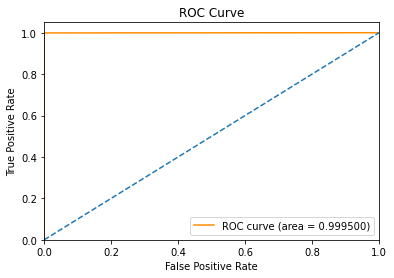

auc is : 0.999500


In [42]:
fpr, tpr, thresholds = roc_curve(train_label,pre)
roc_auc = cc = auc(fpr, tpr)
b_test_auc = roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("auc is : %f" %roc_auc)

For Testing

In [43]:
alpha=[0, 0.001, 0.003, 0.005, 0.007, 0.01]
xgb_model = xgb.XGBClassifier(objective = 'reg:logistic')
xgb_parameters = {'reg_alpha': alpha}
val = GridSearchCV(xgb_model, xgb_parameters, cv = 10)
val = val.fit(test_data_x.values, test_label.values.flatten())
best_a = aa2 =  val.best_params_['reg_alpha']
print('best a is :', best_a)

best a is : 0.003


In [44]:
xgb_model = xgb.XGBClassifier(objective='reg:logistic', reg_alpha = best_a)
xgb_model = xgb_model.fit(train_data_x, train_label)
score = cross_val_score(xgb_model,test_data_x,test_label,scoring = 'accuracy',cv = 5)
pre = xgb_model.predict(test_data_x)
print('the error of 5-fold of testing is:', 1-np.mean(score))
ww2 = 1-np.mean(score)

the error of 5-fold of testing is: 0.008624999999999994


Confusion Matrix of Tesing

In [45]:
cm = metrics.confusion_matrix(test_label, pre)
print(cm)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
print("TRUE POSITIVE: ",TP)
print("FALSE POSITIVE: ",FP)
print("TRUE NEGATIVE: ",TN)
print("FALSE NEGATIVE: ",FN)

[[15612    13]
 [   84   291]]
TRUE POSITIVE:  291
FALSE POSITIVE:  13
TRUE NEGATIVE:  15612
FALSE NEGATIVE:  84


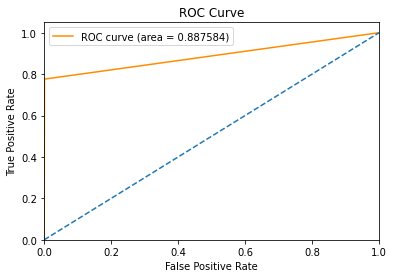

auc is : 0.887584


In [46]:
fpr, tpr, thresholds = roc_curve(test_label,pre)
roc_auc = cc2 = auc(fpr, tpr)
b_test_auc = roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("auc is : %f" %roc_auc)

In [47]:
data = {'training':[aa,ww,cc],'testing':[aa2,ww2,cc2]}
df = pd.DataFrame(data)
df.set_axis(['best alpha', '5-fold error', 'auc'], axis='index',inplace = True)
df

,training,testing
best alpha,0.010000,0.003000
5-fold error,0.005317,0.008625
auc,0.999500,0.887584


(f)

In [48]:
print(train_data['class'].value_counts())

neg    59000
pos     1000
Name: class, dtype: int64


In [49]:
sm = SMOTE()
train_data_x,train_label = sm.fit_resample(train_data_x,train_label)

Now we have neg    59000
pos     59000

For Training

In [50]:
alpha=[0, 0.001, 0.003, 0.005, 0.007, 0.01]
xgb_model = xgb.XGBClassifier(objective = 'reg:logistic')
xgb_parameters = {'reg_alpha': alpha}
val = GridSearchCV(xgb_model, xgb_parameters, cv = 10)
val = val.fit(train_data_x.values, train_label.values.flatten())
best_a = aa = val.best_params_['reg_alpha']
print('best a is :', best_a)

best a is : 0.005


In [51]:
xgb_model = xgb.XGBClassifier(objective='reg:logistic', reg_alpha = best_a)
xgb_model = xgb_model.fit(train_data_x, train_label)
score = cross_val_score(xgb_model,train_data_x,train_label,scoring = 'accuracy',cv = 5)
pre = xgb_model.predict(train_data_x)
print('the error of 5-fold of training is:', 1-np.mean(score))
ww = 1-np.mean(score)

the error of 5-fold of training is: 0.0026694915254236173


Confusion Matrix of Training

In [52]:
cm = metrics.confusion_matrix(train_label, pre)
print(cm)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
print("TRUE POSITIVE: ",TP)
print("FALSE POSITIVE: ",FP)
print("TRUE NEGATIVE: ",TN)
print("FALSE NEGATIVE: ",FN)

[[59000     0]
 [    1 58999]]
TRUE POSITIVE:  58999
FALSE POSITIVE:  0
TRUE NEGATIVE:  59000
FALSE NEGATIVE:  1


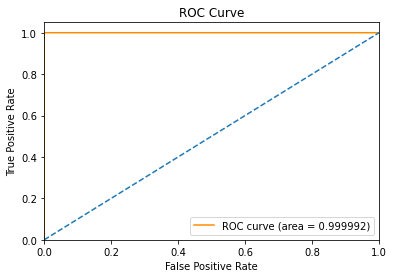

auc is : 0.999992


In [53]:
fpr, tpr, thresholds = roc_curve(train_label,pre)
roc_auc = cc = auc(fpr, tpr)
b_test_auc = roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("auc is : %f" %roc_auc)

For Testing

In [54]:
alpha=[0, 0.001, 0.003, 0.005, 0.007, 0.01]
xgb_model = xgb.XGBClassifier(objective = 'reg:logistic')
xgb_parameters = {'reg_alpha': alpha}
val = GridSearchCV(xgb_model, xgb_parameters, cv = 10)
val = val.fit(test_data_x.values, test_label.values.flatten())
best_a = aa2 = val.best_params_['reg_alpha']
print('best a is :', best_a)

best a is : 0.003


In [55]:
xgb_model = xgb.XGBClassifier(objective='reg:logistic', reg_alpha = best_a)
xgb_model = xgb_model.fit(train_data_x, train_label)
score = cross_val_score(xgb_model,test_data_x,test_label,scoring = 'accuracy',cv = 5)
pre = xgb_model.predict(test_data_x)
print('the error of 5-fold of testing is:', 1-np.mean(score))
ww2 = 1-np.mean(score)

the error of 5-fold of testing is: 0.008624999999999994


Confusion Matrix of Tesing

In [56]:
cm = metrics.confusion_matrix(test_label, pre)
print(cm)
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
print("TRUE POSITIVE: ",TP)
print("FALSE POSITIVE: ",FP)
print("TRUE NEGATIVE: ",TN)
print("FALSE NEGATIVE: ",FN)

[[15578    47]
 [   68   307]]
TRUE POSITIVE:  307
FALSE POSITIVE:  47
TRUE NEGATIVE:  15578
FALSE NEGATIVE:  68


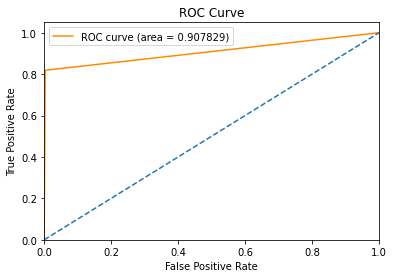

auc is : 0.907829


In [57]:
fpr, tpr, thresholds = roc_curve(test_label,pre)
roc_auc = cc2 = auc(fpr, tpr)
b_test_auc = roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("auc is : %f" %roc_auc)

In [58]:
data = {'training':[aa,ww,cc],'testing':[aa2,ww2,cc2]}
df3 = pd.DataFrame(data)
df3.set_axis(['best alpha', '5-fold error', 'auc'], axis='index',inplace = True)
df3

,training,testing
best alpha,0.005000,0.003000
5-fold error,0.002669,0.008625
auc,0.999992,0.907829


The Uncompensated Case

In [59]:
df

,training,testing
best alpha,0.010000,0.003000
5-fold error,0.005317,0.008625
auc,0.999500,0.887584


SMOTE

In [60]:
df3

,training,testing
best alpha,0.005000,0.003000
5-fold error,0.002669,0.008625
auc,0.999992,0.907829


ISLR 6.6.3

(a)


iv. Steadily decrease option is correct because as we increase s from 0, we will at last reach the problem of lease square where we want to find the β that minimizes training RSS.


(b)


ii. Decrease initially, and then eventually start increasing in a U shape option is correct because as we find the best training value for β, the testing RSS will drop. However, the testing RSS will start increasing because of bias-variance trade off, which means at that point, it starts overfitting.


(c)


iii. Steadily increase option is correct because when we increase s from 0, the flexibility of the model is increasing, thus causing the increase in variance. 


(d)


iv. Steadily decrease option is correct because when we increase s from 0, the flexibility of the model is increasing, thus causing the decrease in bias. In the end, this will become least square.


(e)


v. Remain constant option is correct because the irreducible error always remains constant regardless of other things and that is the name of irreducible come from.


ISLR, 6.6.5

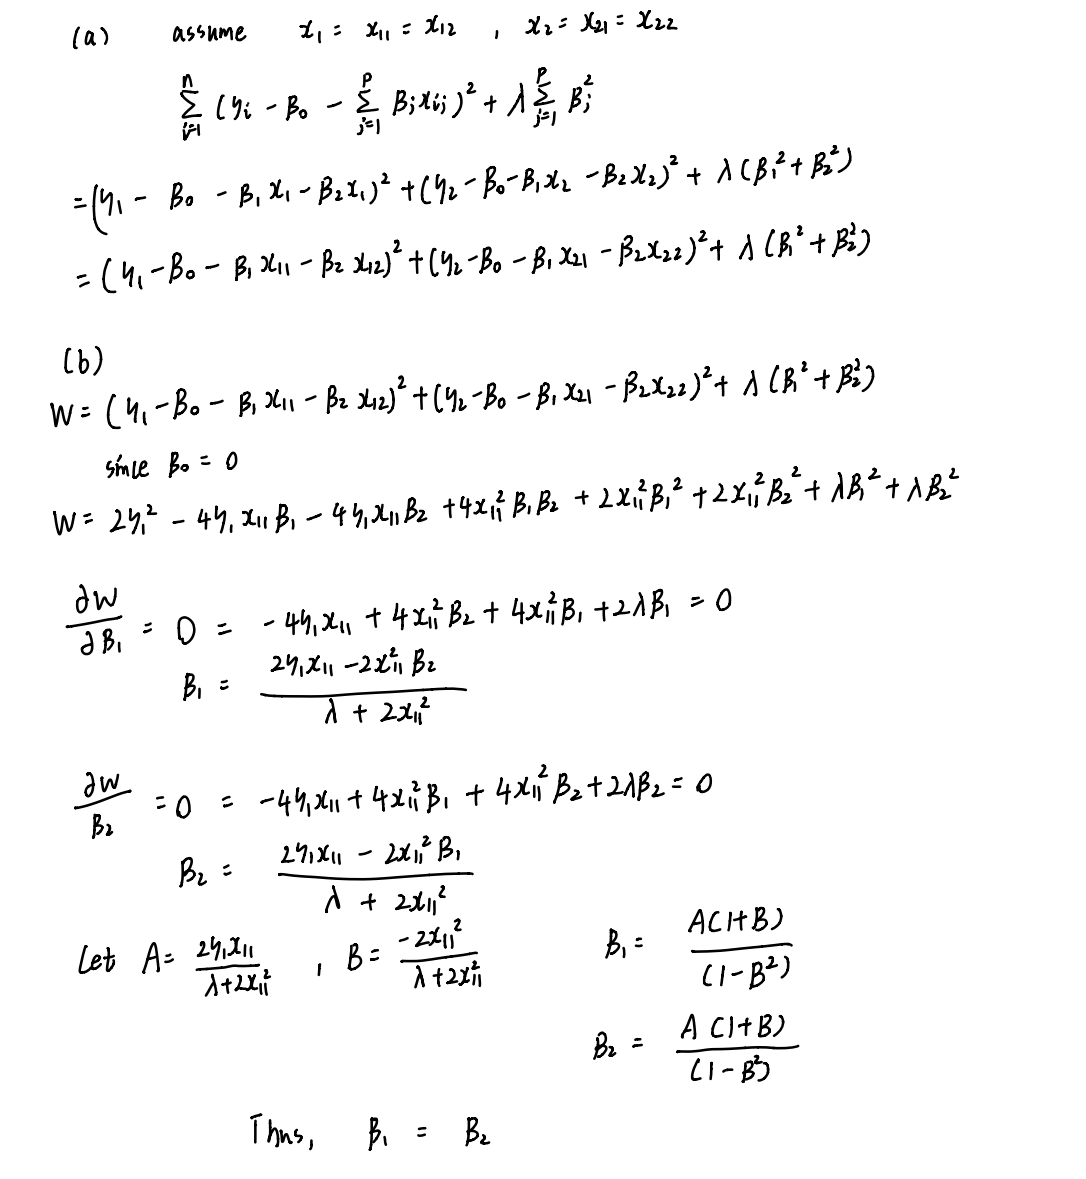

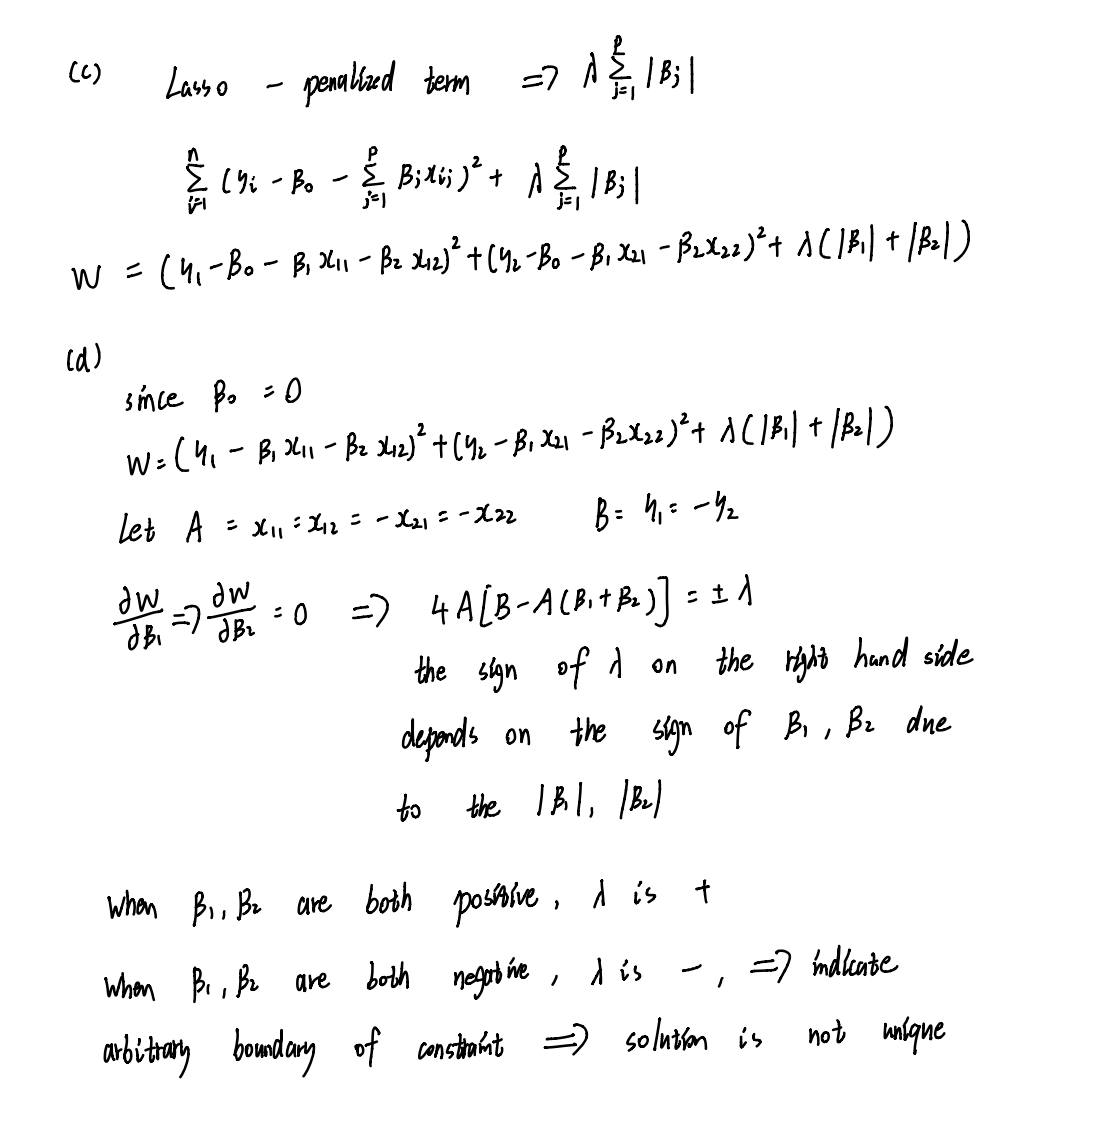

ISLR 8.4.5

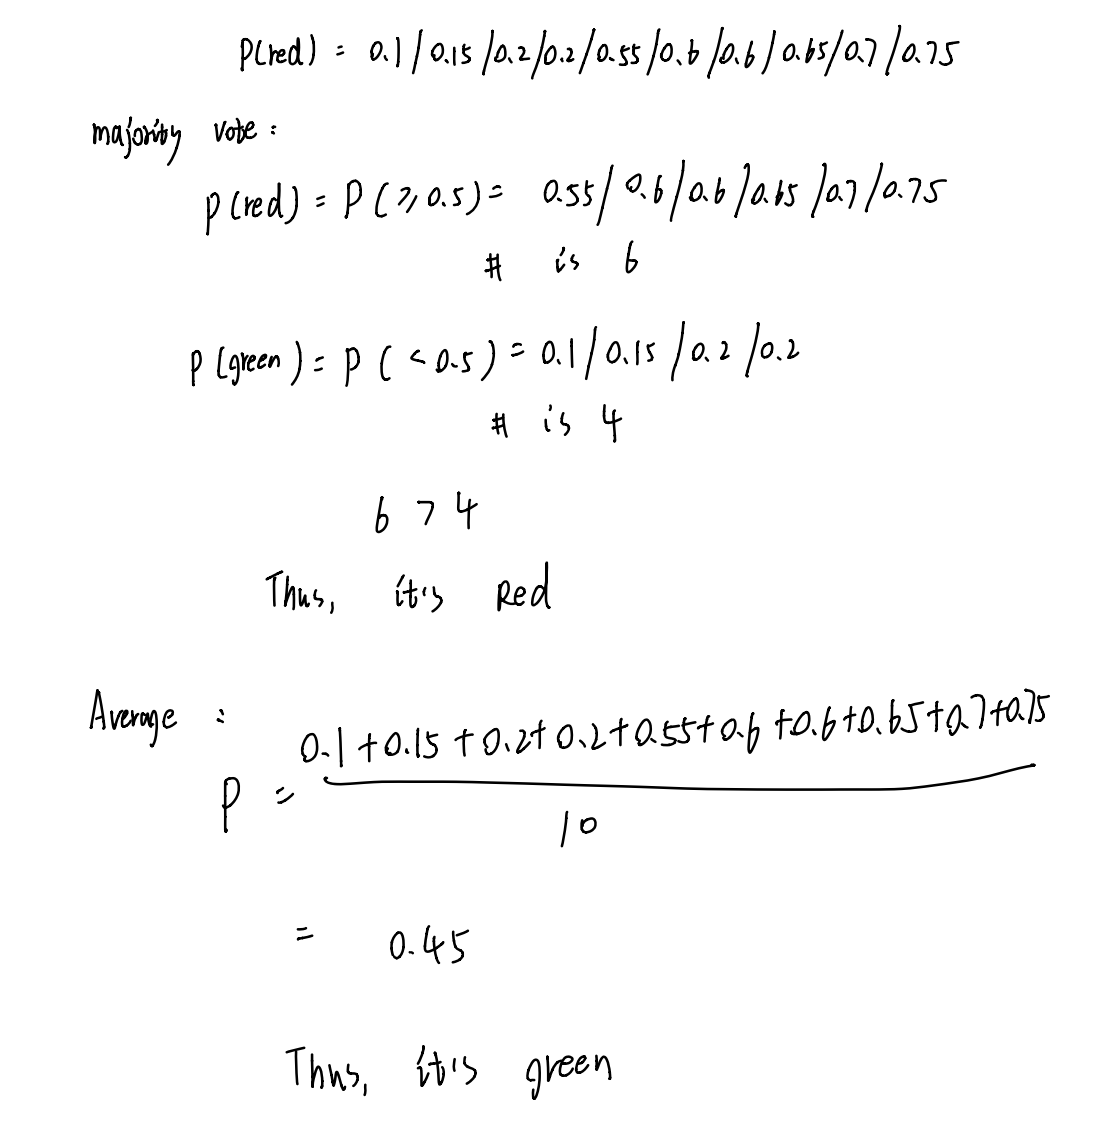

ISLR 9.7.3

(a)

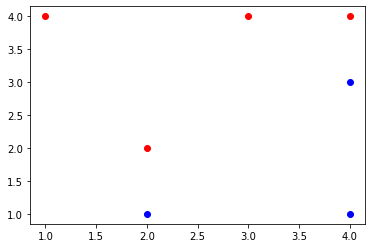

In [61]:
x1 = [3,2,4,1]
y1 = [4,2,4,4]
x2 = [2,4,4]
y2 = [1,3,1]
plt.scatter(x1,y1,c = 'r')
plt.scatter(x2,y2,c = 'b')

(b)

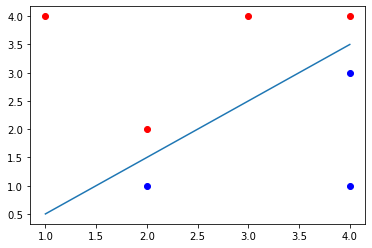

In [62]:
plt.scatter(x1,y1,c = 'r')
plt.scatter(x2,y2,c = 'b')
x3 = np.linspace(1, 4, 6)
x4 = x3 - 0.5
plt.plot(x3,x4)

$-\frac{1}{2}+X_1-X_2  = 0$

(c)

$-\frac{1}{2}+X_1-X_2  > 0$ it is bule

$-\frac{1}{2}+X_1-X_2  \leq 0$ it is red

(d)

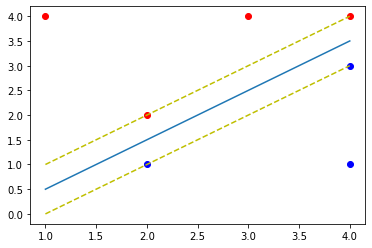

In [63]:
plt.scatter(x1,y1,c = 'r')
plt.scatter(x2,y2,c = 'b')
x3 = np.linspace(1, 4, 6)
x4 = x3 - 0.5
plt.plot(x3,x4)
X5 = np.linspace(1, 4, 6)
X6 = X5 - 0.5
upper = X5
lower = X5 -1
plt.plot(X5, upper, linestyle='--', c = 'y')
plt.plot(X5, lower, linestyle='--', c = 'y')

(e)

The support vectors are two red and two green points lie on the yellow dash line.

(f)

since the seventh observation is not a support vector, a slight movement of it will not affect the maximal margin hyperplane.

(g)

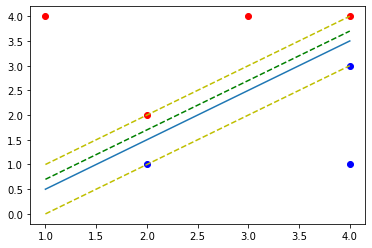

In [64]:
plt.scatter(x1,y1,c = 'r')
plt.scatter(x2,y2,c = 'b')
x3 = np.linspace(1, 4, 6)
x4 = x3 - 0.5
plt.plot(x3,x4)
X5 = np.linspace(1, 4, 6)
X6 = X5 - 0.5
upper = X5
lower = X5 -1
plt.plot(X5, upper, linestyle='--', c = 'y')
plt.plot(X5, lower, linestyle='--', c = 'y')
x7 = np.linspace(1, 4, 6)
x8 = x7-0.3
plt.plot(x7,x8, linestyle='--', c='g')

the green dash line is not the optimal separating hyperplane.

(h)

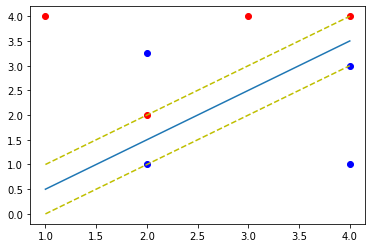

In [65]:
plt.scatter(x1,y1,c = 'r')
plt.scatter(x2,y2,c = 'b')
x3 = np.linspace(1, 4, 6)
x4 = x3 - 0.5
plt.plot(x3,x4)
X5 = np.linspace(1, 4, 6)
X6 = X5 - 0.5
upper = X5
lower = X5 -1
plt.plot(X5, upper, linestyle='--', c='y')
plt.plot(X5, lower, linestyle='--', c='y')
new = [2]
new2 = [3.25]
plt.scatter(new,new2,c = 'b')